In [37]:
from qiskit import *
import numpy as np
import math
%matplotlib inline

pi = math.pi

q = QuantumRegister(5)
c = ClassicalRegister(3)
cir = QuantumCircuit(q, c)
cir.h(q[0])
cir.h(q[1])
cir.h(q[2])
cir.x(q[3])
cir.h(q[3])

# f' = a'b'c'+a'b'c+a'bc'+ab'c'+ab'c+abc'+abc
# f = (a+b+c)(a+b+c')(a+b'+c)(a'+b+c)(a'+b+c')(a'+b'+c)(a'+b'+c')

# 1st iteration
cir.x(q[0])
cir.mct([q[0], q[1], q[2]], q[3], [q[4]])
cir.x(q[0])

cir.barrier([q[0], q[1], q[2]])
cir.measure([q[0], q[1], q[2]], [c[0], c[1], c[2]])
cir.draw()


{'001': 2015, '101': 2109, '111': 2051, '100': 1999, '010': 2070, '000': 2012, '011': 2077, '110': 2051}


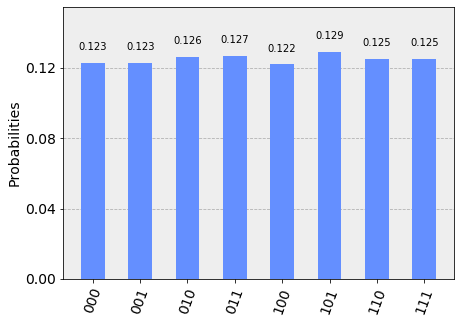

In [38]:
backend = Aer.get_backend('qasm_simulator')
job = execute(cir, backend, shots = 16384)
result = job.result()

counts = result.get_counts(cir)
print(counts)
visualization.plot_histogram(counts)